<a href="https://colab.research.google.com/github/P13L0v3r/Gradient-Descent/blob/master/Gradient_Descent_f(x)_%3D_wx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Libraries that will be used are:
* torch
* numpy
* matplotlib

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

We will first focus on the 1D case of linear regression and gradient descent.

We will assume that the underlying function has the form:

$$f(x) = wx$$
where $w$ is a scalar.

We will try to learn the weight using gradient descent with initial guess $w(0)$ initialized randomly.

The gradient descent update is defined as:

$$w_{j+1} = w_{j} - \eta \nabla_w\mathcal{L}(X,Y,w)$$

where $\mathcal{L}$ is some loss function. We will be using the MSE loss defined as:

$$\mathcal{L}(X,Y,w) = \frac{1}{2n}\sum_{i=1}^n(wx_i - y_i)^2$$
This gives us:

$$\nabla_w \mathcal{L}(X,Y,w) = \frac{1}{n}\sum_{i=1}^n(wx_i - y_i)*x_i$$

Thus our update rule becomes:

$$w_{j+1} = w_{j} - \eta\frac{1}{n}\sum_{i=1}^n(w_jx_i-y_i)*x_i$$

Defining $\delta$ to be the correction term:

$$\delta(w_j) = \frac{1}{n}\sum_{i=1}^n(w_jx_i-y_i)*x_i$$

We then get:

$$\therefore w_{j+1} = w_j - \eta\delta(w_j)$$

Note that if we define the following:

$$X = [x_1 x_2 \cdots x_n]^T$$
$$Y = [y_1 y_2 \cdots y_n]^T$$

We can do the following:
$$E = wX - Y$$
$$E\circ X = \left((wx_i - y_i)*x_i\right)_i$$
$$\therefore \frac{1}{n}\sum_{i=1}^n(wx_i-y_i)*x_i = \left(E\circ X\right).mean()$$

Let us define our test problem. We will be looking at the interval $[-1,1]$ and we will be looking at the function $f(x) = 3x$.

In [0]:
X = torch.arange(-1,1,0.01)
Y = 3*X

Now, we will define a function that will calculate $wx$ for given $w$ and $x$.

In [0]:
def f(x,w):
  return w*x

Let us also define the loss of the data given a guess $w$.

In [0]:
def loss(X,Y,w):
  E = Y-w*X
  return (0.5*E*E).mean()

Now let us write the function that will compute the gradient update. The quantity $N$ will be used to contro how many updates we perform on $w$. This is the notion of an epoch.

In [0]:
def gradDescent(X,Y,w,eta,N):
  for i in range(N):
    E = w*X - Y
    delta = (E*X).mean()
    w -= eta*delta
  return w

Note that for vanilla gradient descent, we use the entirety of the training data, $\mathcal{D} = \{x_i,y_i\}_{i\in I}$, each epoch. To speed up the process, each epoch we can instead choose a random sample of the training data and use this data to calculate our correction and update our weights quicker. This is known as Stochastic Gradient Descent (SGD).

To do this, given $n$ total training samples, let us define a permutation as follows:

$$\Pi = (\sigma(1), \sigma(2), ..., \sigma(n))$$

where $\sigma$ is a bijection from $[n]$ to $[n]$, i.e. a reshuffling of the indexes from 1 to $n$. from $\Pi$, let us choose $\pi$ to be

$$\pi = \Pi[0:s]$$

where $s$ is a number less than $n$.

Now, we have that $\pi$ is a random sampling of $s$ samples in the training data.

Let us then define the following:

$$\mathcal{D}_\pi = \{x_{\sigma(i)}, y_{\sigma(i)}\}_{\sigma(i)\in \pi}$$

$$\mathcal{L}_\pi(X,Y,w) = \frac{1}{s}\sum_{\sigma(i)\in\pi}(wx_{\sigma(i)} - y_{\sigma(i)})x_{\sigma(i)}$$

$$X_\pi = [x_{\sigma(1)} x_{\sigma(2)} \cdots x_{\sigma(s)}]^T$$

$$Y_\pi = [y_{\sigma(1)} y_{\sigma(2)} \cdots y_{\sigma(s)}]^T$$

$$E_\pi = wX_\pi - Y_\pi$$

$$E_\pi\circ X_\pi = \left((wx_{\sigma(i)} - y_{\sigma(i)})*x_{\sigma(i)}\right)_{\sigma(i)}$$

$$\therefore \frac{1}{s}\sum_{\sigma(i)\in\pi}(wx_{\sigma(i)} - y_{\sigma(i)})x_{\sigma(i)} = \left(E_\pi\circ X_\pi\right).mean()$$


In [0]:
def sGradDescent(X,Y,w,eta,N,s):
  n = X.numpy().size
  for i in range(N):
    perm = torch.randperm(n)
    perm = perm[0:s]
    Ypi = Y[perm]
    Xpi = X[perm]
    Epi = w*Xpi - Ypi
    delta = (Epi*Xpi).mean()
    w -= eta*delta
  return w

Now, let us define a starting $w$ randomly.

Note that we need to copy this w three times since we need to pass the values in functions and torch tensors tend to keep track of operations performed on them.

In [0]:
w = torch.rand(1)
w_new = w.clone()
w_new_pi = w.clone()
print(w)

tensor([0.7993])


Let us plot both our data and the predicted line given our initial guess for $w$.

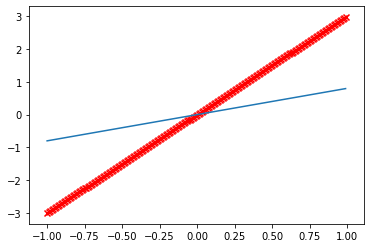

In [0]:
fig, (ax1) = plt.subplots(1, 1)
ax1.plot(X, f(X,w), label='Predicted')
ax1.scatter(X, Y, marker='x', color='red')

Now, let us run both gradient descent with $\eta = .01$ and $N = 500$ as well as SDG with $\eta = .01$, $N = 500$, and $s = 50$.

In [0]:
w_new = gradDescent(X,Y,w_new,0.01,500)
w_new_pi = sGradDescent(X,Y,w_new_pi,0.01,500,50)

Now let us look at the initial $w$ and initial loss as well as the final $w$'s and the final losses.

In [0]:
print(w)
print(loss(X,Y,w))
print(w_new)
print(loss(X,Y,w_new))
print(w_new_pi)
print(loss(X,Y,w_new_pi))

tensor([0.7993])
tensor(0.8072)
tensor([2.5855])
tensor(0.0286)
tensor([2.5832])
tensor(0.0290)


Let us graph these values and see what the final lines look like.

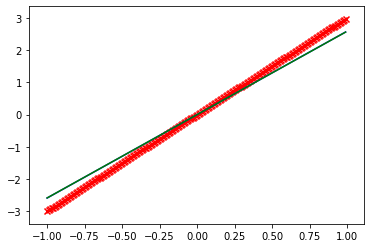

In [0]:
fig, (ax1) = plt.subplots(1, 1)
ax1.plot(X, f(X,w_new), label='Predicted', color='blue')
ax1.scatter(X, Y, marker='x', color='red')
ax1.plot(X, f(X,w_new_pi), label='Predicted', color='green')

Now let us do the same thing again but this time run both algorithms for 1000 epochs to see what our results are.

tensor([0.9853])
tensor([0.9853])
tensor(0.6766)
tensor([2.9285])
tensor(0.0009)
tensor([2.9271])
tensor(0.0009)


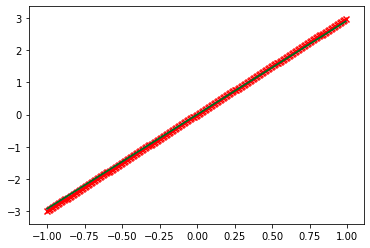

In [0]:
w = torch.rand(1)
w_new = w.clone()
w_new_pi = w.clone()
print(w)

w_new = gradDescent(X,Y,w_new,0.01,1000)
w_new_pi = sGradDescent(X,Y,w_new_pi,0.01,1000,50)

print(w)
print(loss(X,Y,w))
print(w_new)
print(loss(X,Y,w_new))
print(w_new_pi)
print(loss(X,Y,w_new_pi))

fig, (ax1) = plt.subplots(1, 1)
ax1.plot(X, f(X,w_new), label='Predicted', color='blue')
ax1.scatter(X, Y, marker='x', color='red')
ax1.plot(X, f(X,w_new_pi), label='Predicted', color='green')

Thus we see that both algorithms find a value of $w$ that is very close to the true value.